In [1]:
from nansat import *

In [2]:
# download and unzip file if necessary
#!wget http://data.nodc.noaa.gov/thredds/fileServer/ghrsst/L4/GLOB/UKMO/OSTIA/2014/073/20140314-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2
#!bunzip2 20140314-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2

# open local file with sea surface temperature
n1 = Nansat('20140314-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc')

=>Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2)<=


In [3]:
# establish access to remote data stream with geostrophic currents
n2 = Nansat('http://tds0.ifremer.fr/thredds/dodsC/CLS-L4-CURGEO_0M-ALT_OI_012-V02.0_FULL_TIME_SERIE',
            date='2014-03-14',
            cachedir='./')

/home/antonk/py/nansat/nansat/mappers/opendap.py:89: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/antonk/py/nansat/nansat/mappers/opendap.py:91: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')


In [4]:
# establish access to remote data stream with chlorophyll
n3 = Nansat('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v3.0-5DAY',
           date='2014-03-14',
           bands=['chlor_a'],
           cachedir='./')

In [5]:
# crop high resolution SST dataset to Indian ocean (lon/lat limits in brackets)
n1.crop_lonlat([50, 80], [0, 30])

# reproject (resample) GLOBCURRENT dataset to SST cropped dataset
n2.reproject(n1)

# reproject (resample) OC-CCI dataset to SST cropped dataset
n3.reproject(n1)

In [6]:
# Fetch data

# fetch data with SST (2D-matrix)
sst = n1['analysed_sst']
# replace negtaive values (over land) with not-a-number
sst[sst < 0] = np.nan

# fetch data with geostrophic current components
u = n2['eastward_geostrophic_current_velocity']
v = n2['northward_geostrophic_current_velocity']

# fetch data with chlorophyll
chlor_a = n3['chlor_a']

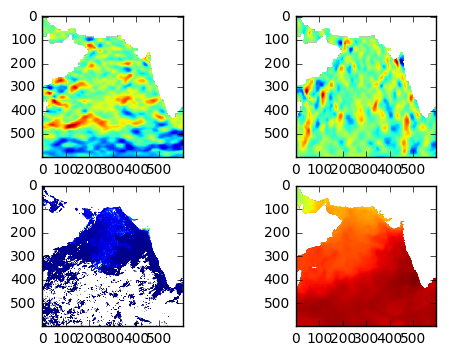

In [7]:
# Simple plotting

# make canvas for the first plot on 2 x 2 grid
plt.subplot(2,2,1)
# show image of U-component
plt.imshow(u)
plt.subplot(2,2,2)
plt.imshow(v)
plt.subplot(2,2,3)
plt.imshow(chlor_a)
plt.subplot(2,2,4)
plt.imshow(sst)
plt.show()

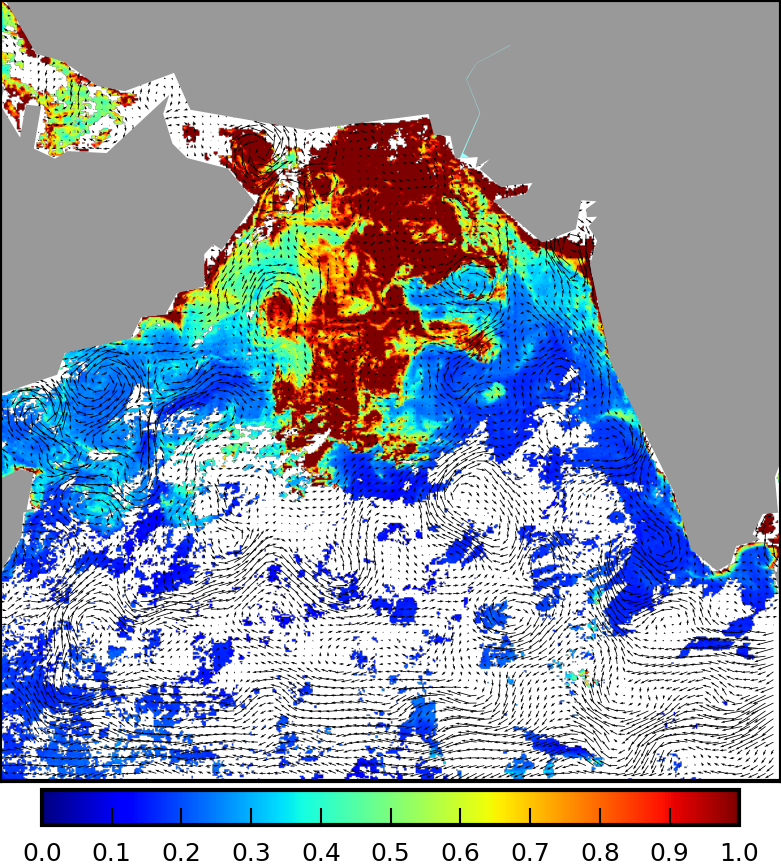

In [8]:
# More advanced plotting

# create and empty canvas for making a map
nmap = Nansatmap(n1)
# show image with chlorophyll
nmap.imshow(chlor_a, vmin=0, vmax=1)
# show SST as contour lines
#nmap.contour(sst-273, smooth=1, levels=range(20,30), colors='k', linewidths=0.5, label=False)
# show U/V components as arrows
nmap.quiver(u, v, quivectors=100, width=0.001, scale=25)
# add Chlorophyll colorbar
nmap.add_colorbar(shrink=0.5)
# save as a PNG file
nmap.save('chl_uv_map.png', dpi=300)

# diaplsy PNG file
from IPython.core.display import Image
Image(filename='chl_uv_map.png')